## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
import os
import joblib
import pickle

from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, f1_score, confusion_matrix

warnings.filterwarnings('ignore')
sns.set()
%matplotlib inline

In [25]:
os.getcwd()

'c:\\Users\\Administrator\\Desktop\\projects\\Abdeltawab\\notebooks'

## Importing data

In [2]:
FILE_PATH = os.path.join(os.getcwd(), '..', 'datasets', 'Crop_recommendation.csv')
df = pd.read_csv(FILE_PATH)

## Inspecting data

In [3]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
N,2200.0,50.551818,36.917334,0.000000,21.000000,37.000000,84.250000,140.000000
P,2200.0,53.362727,32.985883,5.000000,28.000000,51.000000,68.000000,145.000000
K,2200.0,48.149091,50.647931,5.000000,20.000000,32.000000,49.000000,205.000000
temperature,2200.0,25.616244,5.063749,8.825675,22.769375,25.598693,28.561654,43.675493
humidity,2200.0,71.481779,22.263812,14.258040,60.261953,80.473146,89.948771,99.981876
ph,2200.0,6.469480,0.773938,3.504752,5.971693,6.425045,6.923643,9.935091
rainfall,2200.0,103.463655,54.958389,20.211267,64.551686,94.867624,124.267508,298.560117


## Preprocessing

In [6]:
# Encoder
encoder = LabelEncoder()
df['label'] = encoder.fit_transform(df['label'])

In [7]:
MODEL_PATH = os.path.join(os.getcwd(), '..', 'models')
joblib.dump(encoder, MODEL_PATH + "/encoder_preprocessor.pkl")

['c:\\Users\\Administrator\\Desktop\\projects\\Abdeltawab\\notebooks\\..\\models/encoder_preprocessor.pkl']

In [8]:
df.columns.tolist()

['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label']

In [9]:
# Normalization
col = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
scaler = MinMaxScaler()
# scaler.fit_transform(df)

df[col] = scaler.fit_transform(df[col])

In [10]:
MODEL_PATH = os.path.join(os.getcwd(), '..', 'models')
joblib.dump(scaler, MODEL_PATH + "/scaler_preprocessor.pkl")

['c:\\Users\\Administrator\\Desktop\\projects\\Abdeltawab\\notebooks\\..\\models/scaler_preprocessor.pkl']

In [11]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,0.642857,0.264286,0.190,0.345886,0.790267,0.466264,0.656458,20
1,0.607143,0.378571,0.180,0.371445,0.770633,0.549480,0.741675,20
2,0.428571,0.357143,0.195,0.406854,0.793977,0.674219,0.875710,20
3,0.528571,0.214286,0.175,0.506901,0.768751,0.540508,0.799905,20
4,0.557143,0.264286,0.185,0.324378,0.785626,0.641291,0.871231,20


## Correlation

<Axes: >

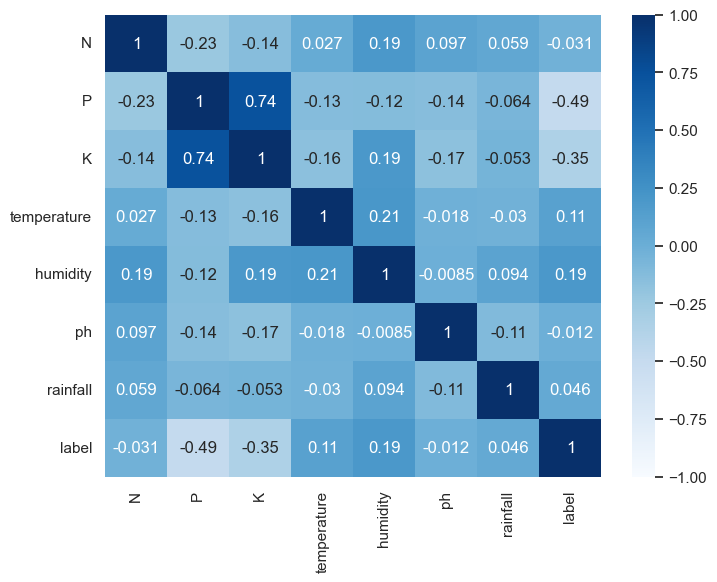

In [12]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), cmap='Blues', annot=True, vmax=1, vmin=-1)

## EDA

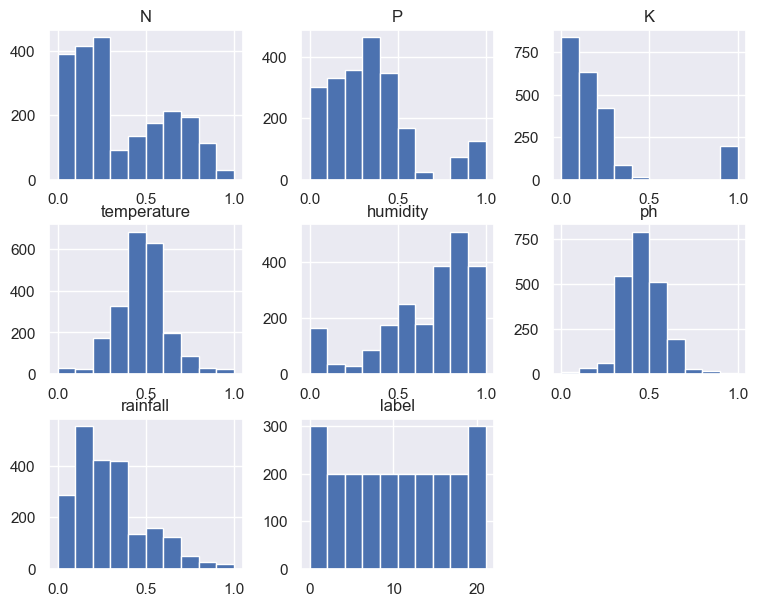

In [13]:
df.hist(figsize=(9,7));

## Splitting data

In [14]:
X = df.drop(columns=['label'], axis=1)
y = df['label']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## Modelling

### LogisticRegression

In [16]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [17]:
y_pred = lr.predict(X_test)

# Evaluation
f1_scor = f1_score(y_test, y_pred, average='macro')
print(f'F1-Score: {f1_scor * 100:.2f}%')

F1-Score: 94.04%


In [18]:
class_repo = classification_report(y_true= y_test , y_pred= y_pred)
print(class_repo)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        20
           2       0.95      0.95      0.95        20
           3       1.00      1.00      1.00        20
           4       0.95      1.00      0.98        20
           5       1.00      1.00      1.00        20
           6       0.87      1.00      0.93        20
           7       1.00      1.00      1.00        20
           8       1.00      0.80      0.89        20
           9       0.91      1.00      0.95        20
          10       0.89      0.85      0.87        20
          11       1.00      0.85      0.92        20
          12       0.83      1.00      0.91        20
          13       0.88      0.75      0.81        20
          14       0.91      1.00      0.95        20
          15       0.91      1.00      0.95        20
          16       1.00      0.90      0.95        20
          17       0.94    

In [19]:
MODEL_PATH = os.path.join(os.getcwd(), '..', 'models')
joblib.dump(lr, MODEL_PATH + "/logistic_regression_model.pkl")

['c:\\Users\\Administrator\\Desktop\\projects\\Abdeltawab\\notebooks\\..\\models/logistic_regression_model.pkl']

### Random Forest

In [20]:
rf = RandomForestClassifier(n_estimators=150, max_depth=5)
rf.fit(X_train, y_train)

,n_estimators,150
,criterion,'gini'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [21]:
y_pred = rf.predict(X_test)

# Evaluation
f1_scor = f1_score(y_test, y_pred, average='macro')
print(f'F1-Score: {f1_scor * 100:.2f}%')

F1-Score: 96.70%


In [22]:
class_repo = classification_report(y_true= y_test , y_pred= y_pred)
print(class_repo)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        20
           2       0.95      0.95      0.95        20
           3       1.00      1.00      1.00        20
           4       1.00      1.00      1.00        20
           5       1.00      1.00      1.00        20
           6       1.00      1.00      1.00        20
           7       1.00      1.00      1.00        20
           8       1.00      0.55      0.71        20
           9       1.00      1.00      1.00        20
          10       0.90      0.95      0.93        20
          11       0.95      1.00      0.98        20
          12       1.00      1.00      1.00        20
          13       0.94      0.85      0.89        20
          14       1.00      1.00      1.00        20
          15       1.00      1.00      1.00        20
          16       1.00      1.00      1.00        20
          17       1.00    

In [23]:
MODEL_PATH = os.path.join(os.getcwd(), '..', 'models')
joblib.dump(rf, MODEL_PATH + "/random_forest_model.pkl")

['c:\\Users\\Administrator\\Desktop\\projects\\Abdeltawab\\notebooks\\..\\models/random_forest_model.pkl']